v0.1 (04/11/24)

## NeuroMotor Project

In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa

import scipy.signal as sig

path_all = '../RepositoryData'
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
# list the styles available
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
single_subject = path_all + '/SL01-T01'
sgl_subj_eeg = single_subject + '/eeg.txt'

In [4]:
# # check the path
# !ls -l $path_all

In [5]:
# the data we want from 2min to 17min with fs = 100Hz
t_walk_min = [2, 17]
t_stand_min = [0, 2]
t_walkBCI_min = [17, 22]
t_stand_min_2 = [22, 24]

fs = 100

t_walk_data = {'t_start_walk': t_walk_min[0]*60*fs, 't_end_walk': t_walk_min[1]*60*fs}
t_stand_data = {'t_start_stand': t_stand_min[0]*60*fs, 't_end_stand': t_stand_min[1]*60*fs}
t_walkBCI_data = {'t_start_walkBCI': t_walkBCI_min[0]*60*fs, 't_end_walkBCI': t_walkBCI_min[1]*60*fs}
t_stand_data_2 = {'t_start_stand_2': t_stand_min_2[0]*60*fs, 't_end_stand_2': t_stand_min_2[1]*60*fs}

# need the data other than the walkBCI and concatenate the other data
t_useful_data = {'t_start_useful_1': t_stand_data['t_end_stand'], 't_end_useful_1': t_walk_data['t_start_walk'], 't_start_useful_2': t_stand_data_2['t_end_stand_2']}

t_1st_stand_walk = {'t_start_stand': t_stand_data['t_start_stand'], 't_end_walk': t_walk_data['t_end_walk']}

In [6]:
# Load the data
eeg = pd.read_csv(sgl_subj_eeg, sep='\t', on_bad_lines='warn', skiprows=1, header=None)
eeg.dropna(axis=1, how='all', inplace=True)
# first column is the time in seconds
time = eeg.iloc[:, 0]
eeg = eeg.iloc[:, 1:]
# print(eeg.head(10))
print(time.head(10))
# take df to numpy array
eeg = eeg.to_numpy()
time = time.to_numpy()
print(eeg.shape, time.shape)

0    0.139
1    0.142
2    0.153
3    0.163
4    0.174
5    0.184
6    0.194
7    0.205
8    0.215
9    0.226
Name: 0, dtype: float64
(137242, 64) (137242,)


In [7]:
print(time[0:100])

[0.139 0.142 0.153 0.163 0.174 0.184 0.194 0.205 0.215 0.226 0.236 0.246
 0.257 0.267 0.278 0.288 0.298 0.309 0.319 0.33  0.34  0.35  0.361 0.371
 0.382 0.392 0.402 0.413 0.423 0.434 0.444 0.455 0.466 0.476 0.487 0.497
 0.507 0.518 0.528 0.539 0.549 0.56  0.571 0.581 0.592 0.602 0.612 0.623
 0.633 0.644 0.654 0.665 0.676 0.686 0.697 0.707 0.717 0.728 0.738 0.749
 0.759 0.77  0.781 0.791 0.802 0.812 0.823 0.833 0.843 0.854 0.864 0.874
 0.885 0.895 0.906 0.916 0.927 0.938 0.948 0.959 0.969 0.979 0.99  1.
 1.011 1.021 1.032 1.043 1.053 1.064 1.074 1.085 1.098 1.108 1.119 1.13
 1.14  1.151 1.161 1.172]


In [9]:
channel_1 = eeg[:, 1]
print(channel_1[0:10])
# print(time[1000:1010].shape, channel_1[1000:1010].shape)
print(time[0:10])

print('Time interval: ', t_int_data)

# graph the spectrum using librosa

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(time[t_1st_stand_walk['t_start_stand']:t_1st_stand_walk['t_end_walk']], channel_1[t_1st_stand_walk['t_start_stand']:t_1st_stand_walk['t_end_walk']])
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
# use librosa to plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(channel_1[t_1st_stand_walk['t_start_stand']:t_1st_stand_walk['t_end_walk']])), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()



[ 0.   0.   0.   0.   0.   0.  23.5 22.8 23.5 22.8]
[0.139 0.142 0.153 0.163 0.174 0.184 0.194 0.205 0.215 0.226]


NameError: name 't_int_data' is not defined

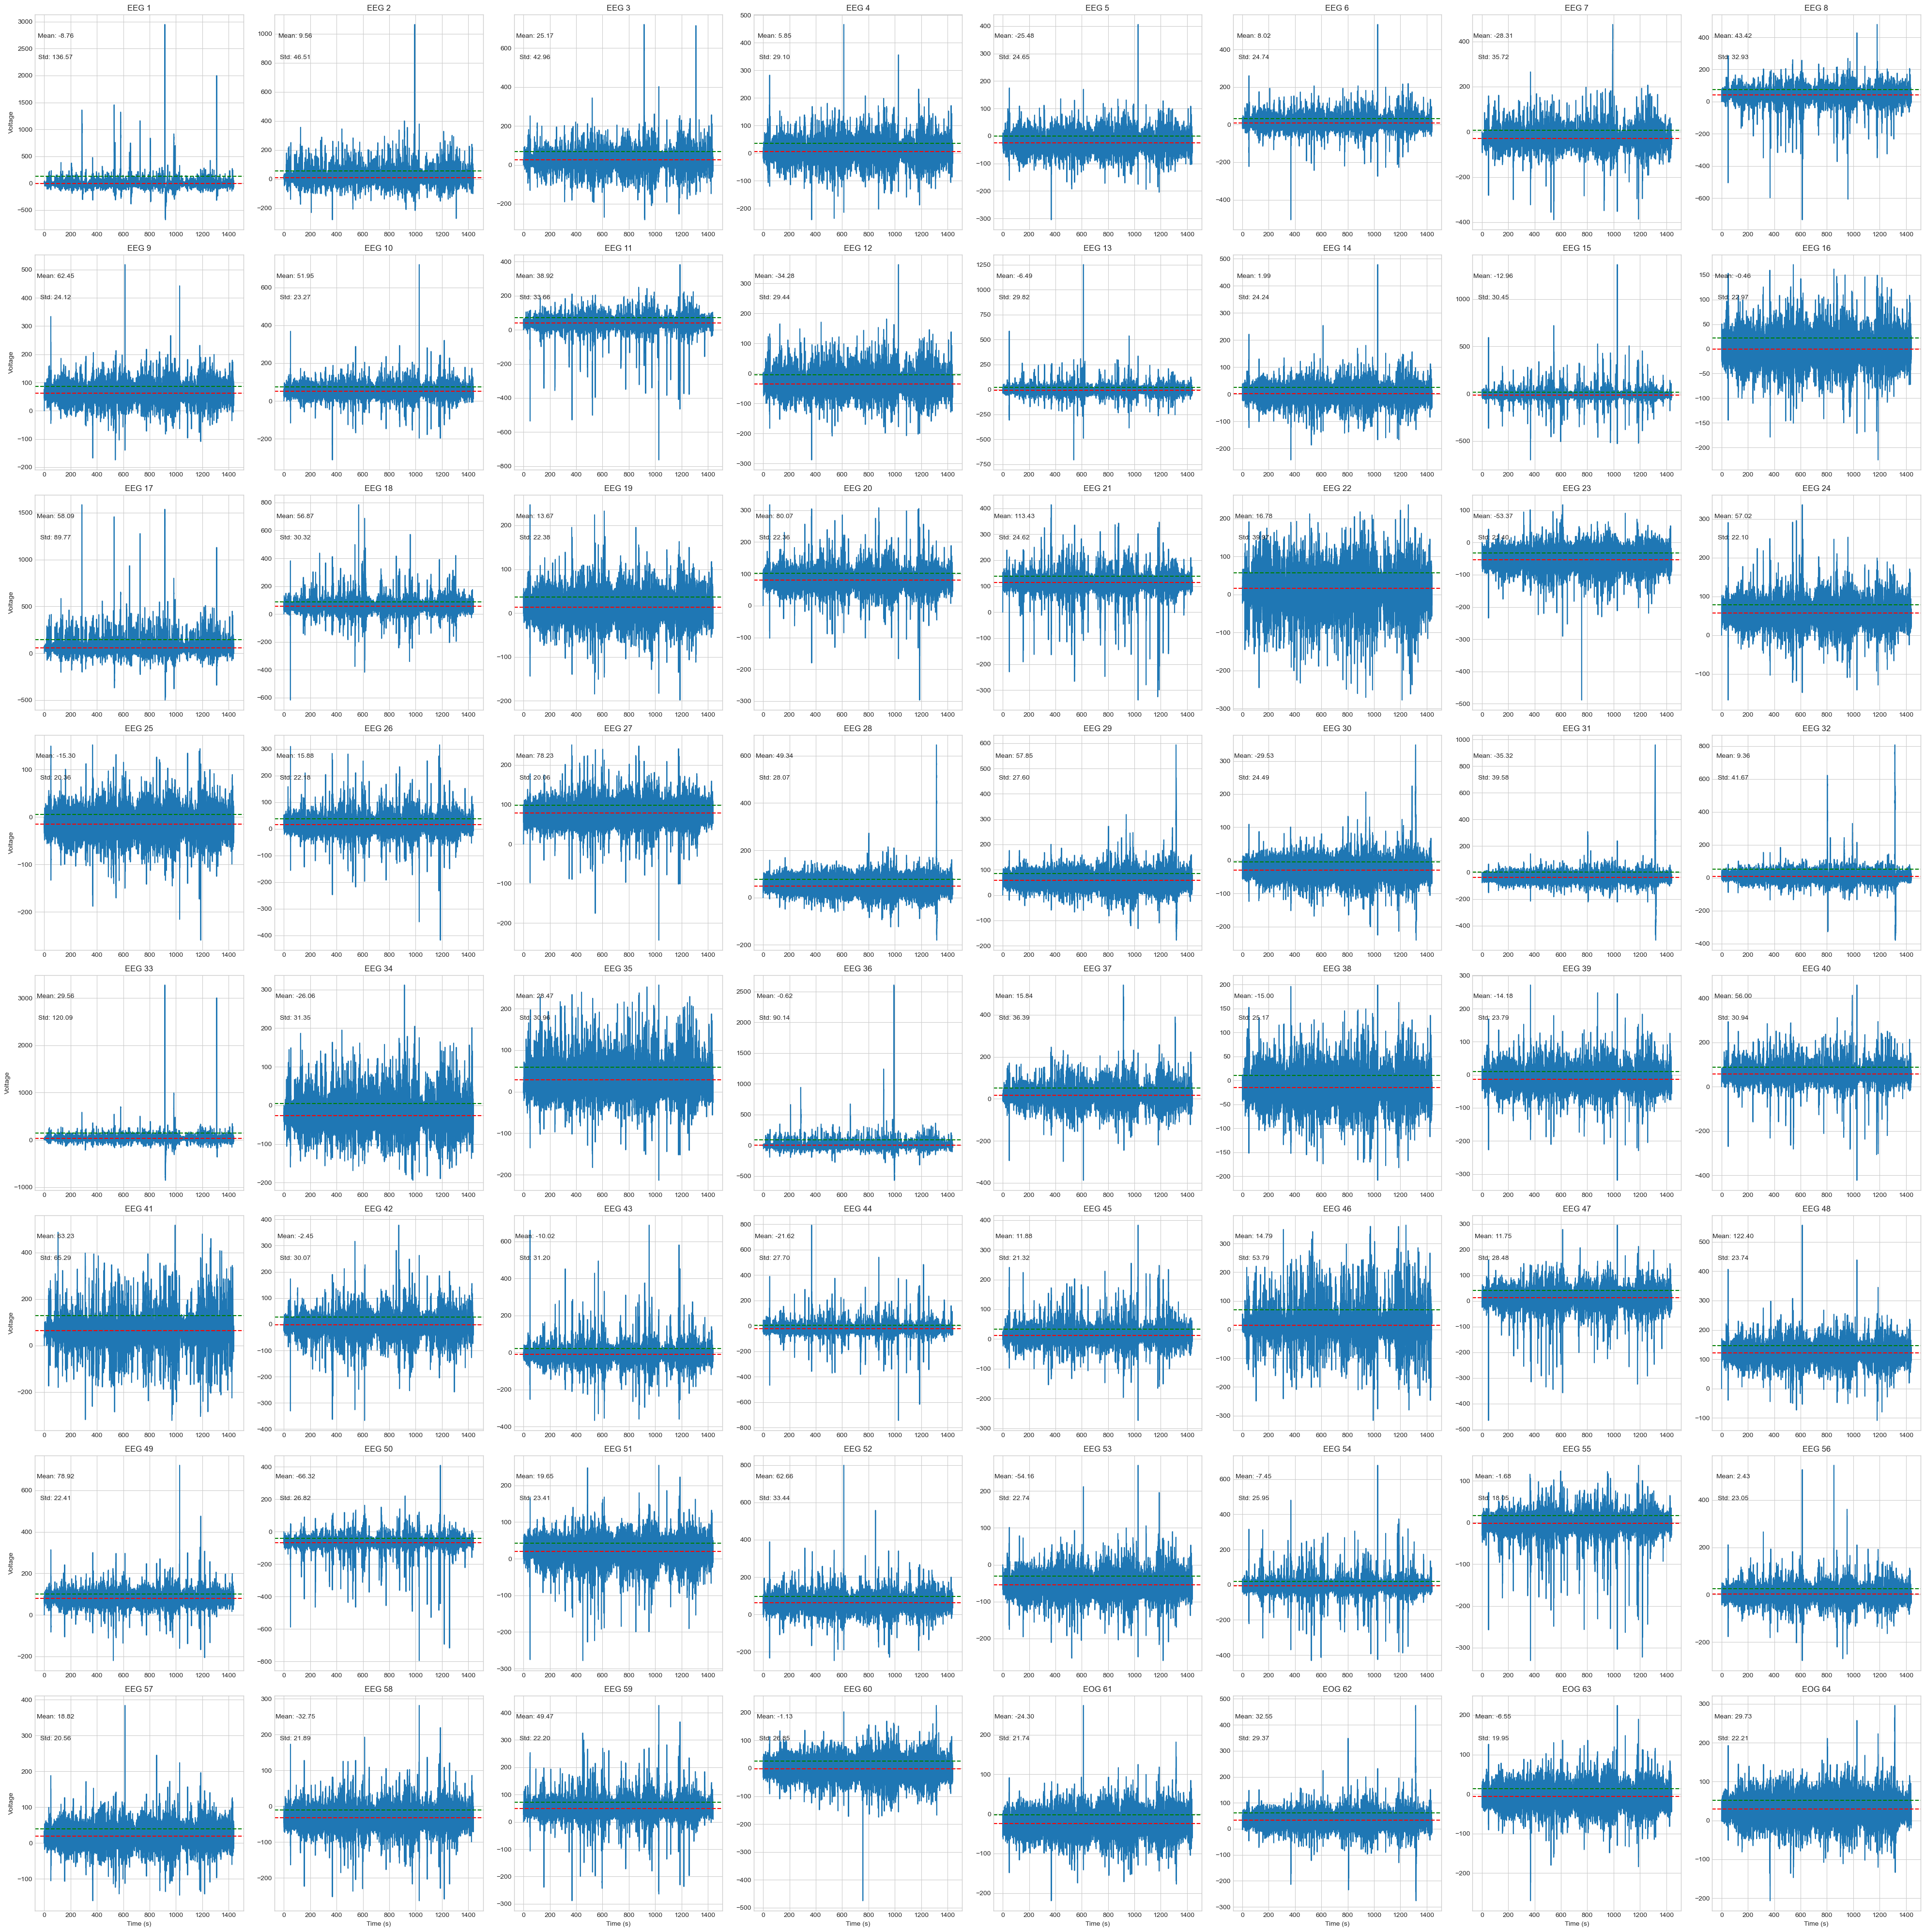

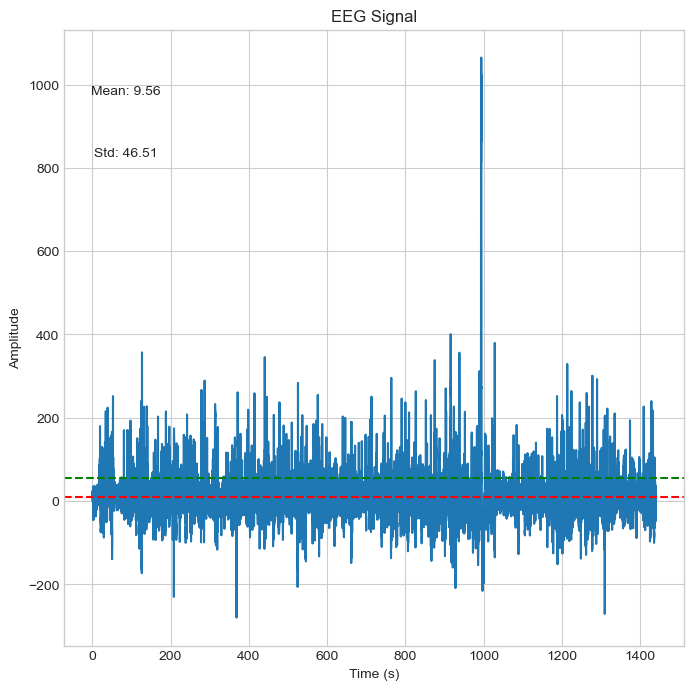

In [15]:
# plot 64 channels in 8x8 grid, label the last 4 channels as EOG, and first 60 as EEG
def visualize_subject_eeg(eeg, time):
    fig, axs = plt.subplots(8, 8, figsize=(40, 40))
    for i in range(8):
        for j in range(8):
            mean = np.mean(eeg[:, i * 8 + j])
            std = np.std(eeg[:, i * 8 + j])
            axs[i, j].plot(time, eeg[:, i * 8 + j])
            axs[i, j].axhline(mean, color='r', linestyle='--', label='Mean', c='r')
            axs[i, j].axhline(mean + std, color='g', linestyle='--', label='Mean + Std', c='g')
            # text on graph showing the mean and std
            axs[i, j].text(0.1, 0.9, 'Mean: {:.2f}'.format(mean), horizontalalignment='center', verticalalignment='center', transform=axs[i, j].transAxes, fontsize=10)
            axs[i, j].text(0.1, 0.8, 'Std: {:.2f}'.format(std), horizontalalignment='center', verticalalignment='center', transform=axs[i, j].transAxes, fontsize=10)
            if i == 7:
                axs[i, j].set_xlabel('Time (s)')
            if j == 0:
                axs[i, j].set_ylabel('Voltage')
            if i * 8 + j < 60:
                axs[i, j].set_title('EEG ' + str(i * 8 + j + 1))
            else:
                axs[i, j].set_title('EOG ' + str(i * 8 + j + 1))
    plt.tight_layout()
    plt.show()

visualize_subject_eeg(eeg, time)

# plot one channel
eeg_single = eeg[:, 1]
time_single = time
mean_single = np.mean(eeg_single)
std_single = np.std(eeg_single)

plt.figure(figsize=(8, 8))
plt.plot(time_single, eeg_single)
plt.axhline(mean_single, color='r', linestyle='--', label='Mean', c='r')
plt.axhline(mean_single + std_single, color='g', linestyle='--', label='Mean + Std', c='g')
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.text(0.1, 0.9, 'Mean: {:.2f}'.format(mean_single), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 0.8, 'Std: {:.2f}'.format(std_single), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

plt.show()

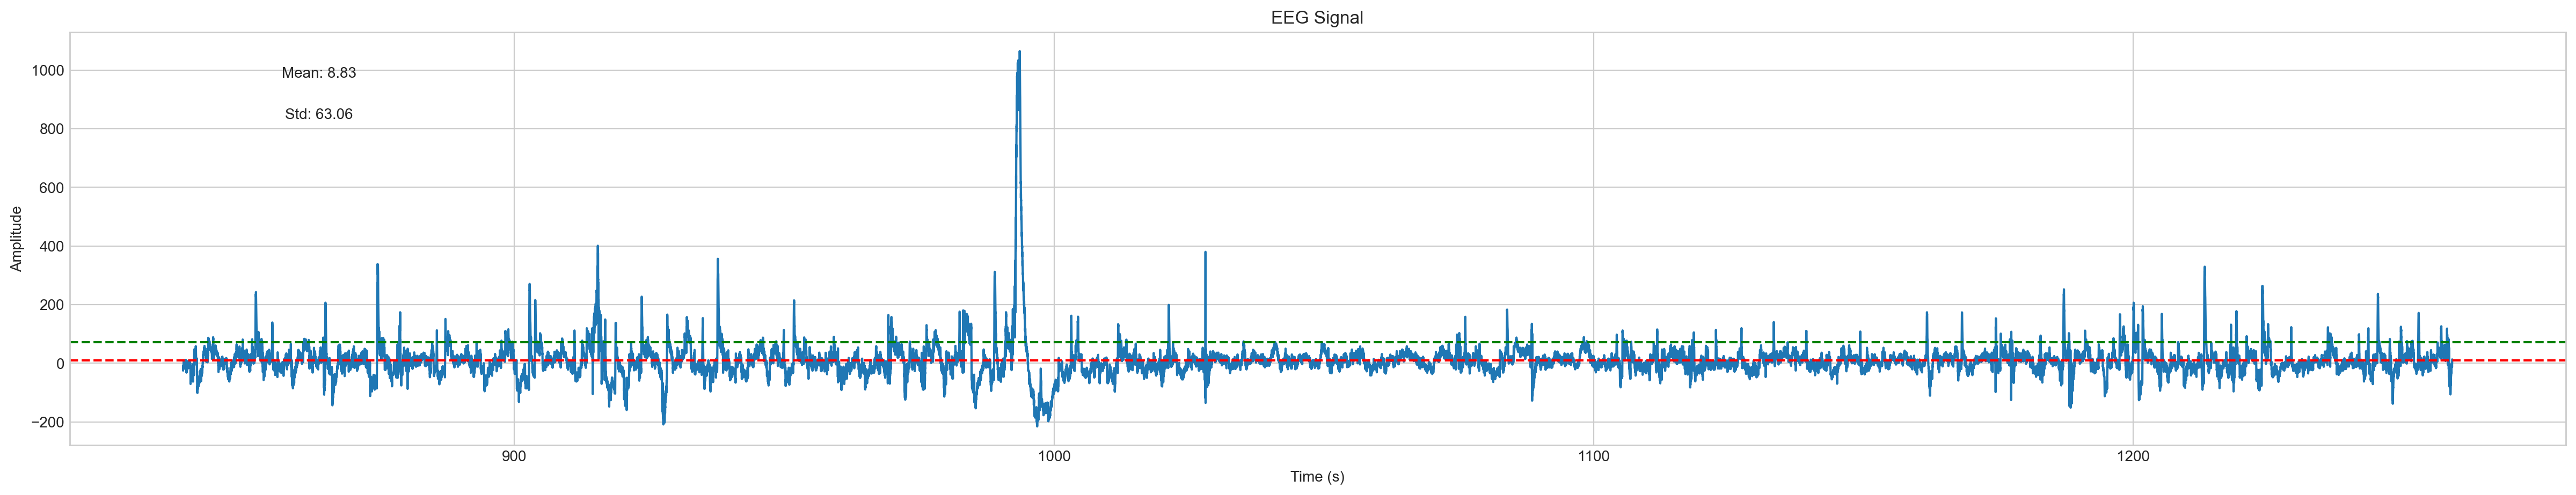

In [24]:
# plot one channel
eeg_single = eeg[:, 1]
time_single = time
mean_single = np.mean(eeg_single)
std_single = np.std(eeg_single)

# make it around 1000 second +- 200
fs = 100
eeg_single = eeg_single[800*fs:1200*fs]
time_single = time_single[800*fs:1200*fs]
std_single = np.std(eeg_single)
mean_single = np.mean(eeg_single)

plt.figure(figsize=(30, 5), dpi=200)
plt.plot(time_single, eeg_single)
plt.axhline(mean_single, color='r', linestyle='--', label='Mean', c='r')
plt.axhline(mean_single + std_single, color='g', linestyle='--', label='Mean + Std', c='g')
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.text(0.1, 0.9, 'Mean: {:.2f}'.format(mean_single), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.1, 0.8, 'Std: {:.2f}'.format(std_single), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

plt.show()



In [26]:
def butter_lowpass(cutoff, fs, order=5):
    return sig.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = sig.lfilter(b, a, data)
    return y

def highpass_filter(data, cutoff, fs, order=5):
    b, a = sig.butter(order, cutoff, btype='high', fs=fs)
    y = sig.filtfilt(b, a, data)
    return y

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = sig.butter(order, [lowcut, highcut], btype='band', fs=fs)
    y = sig.filtfilt(b, a, data)
    return y

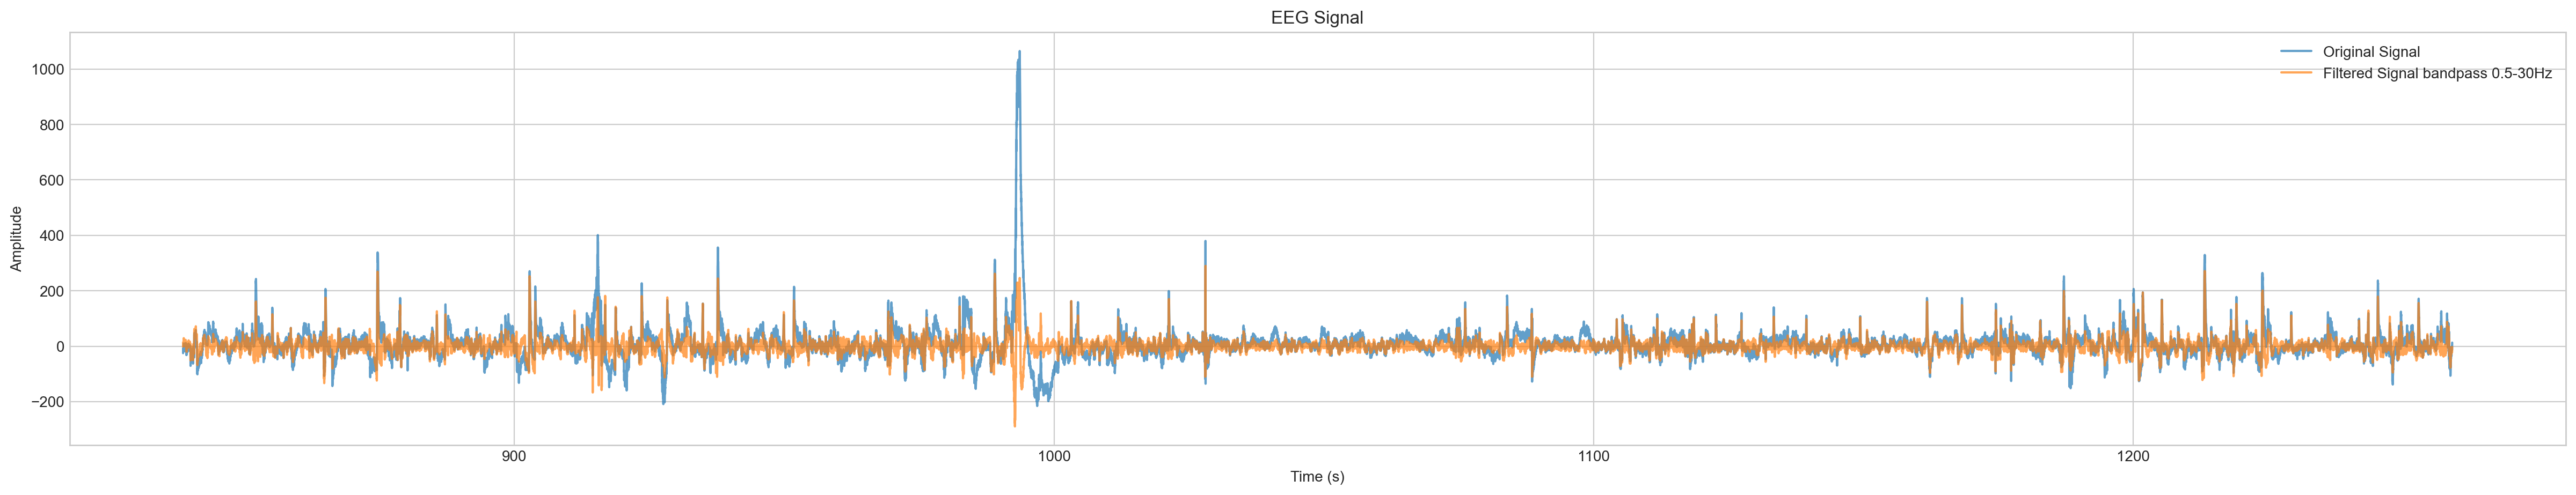

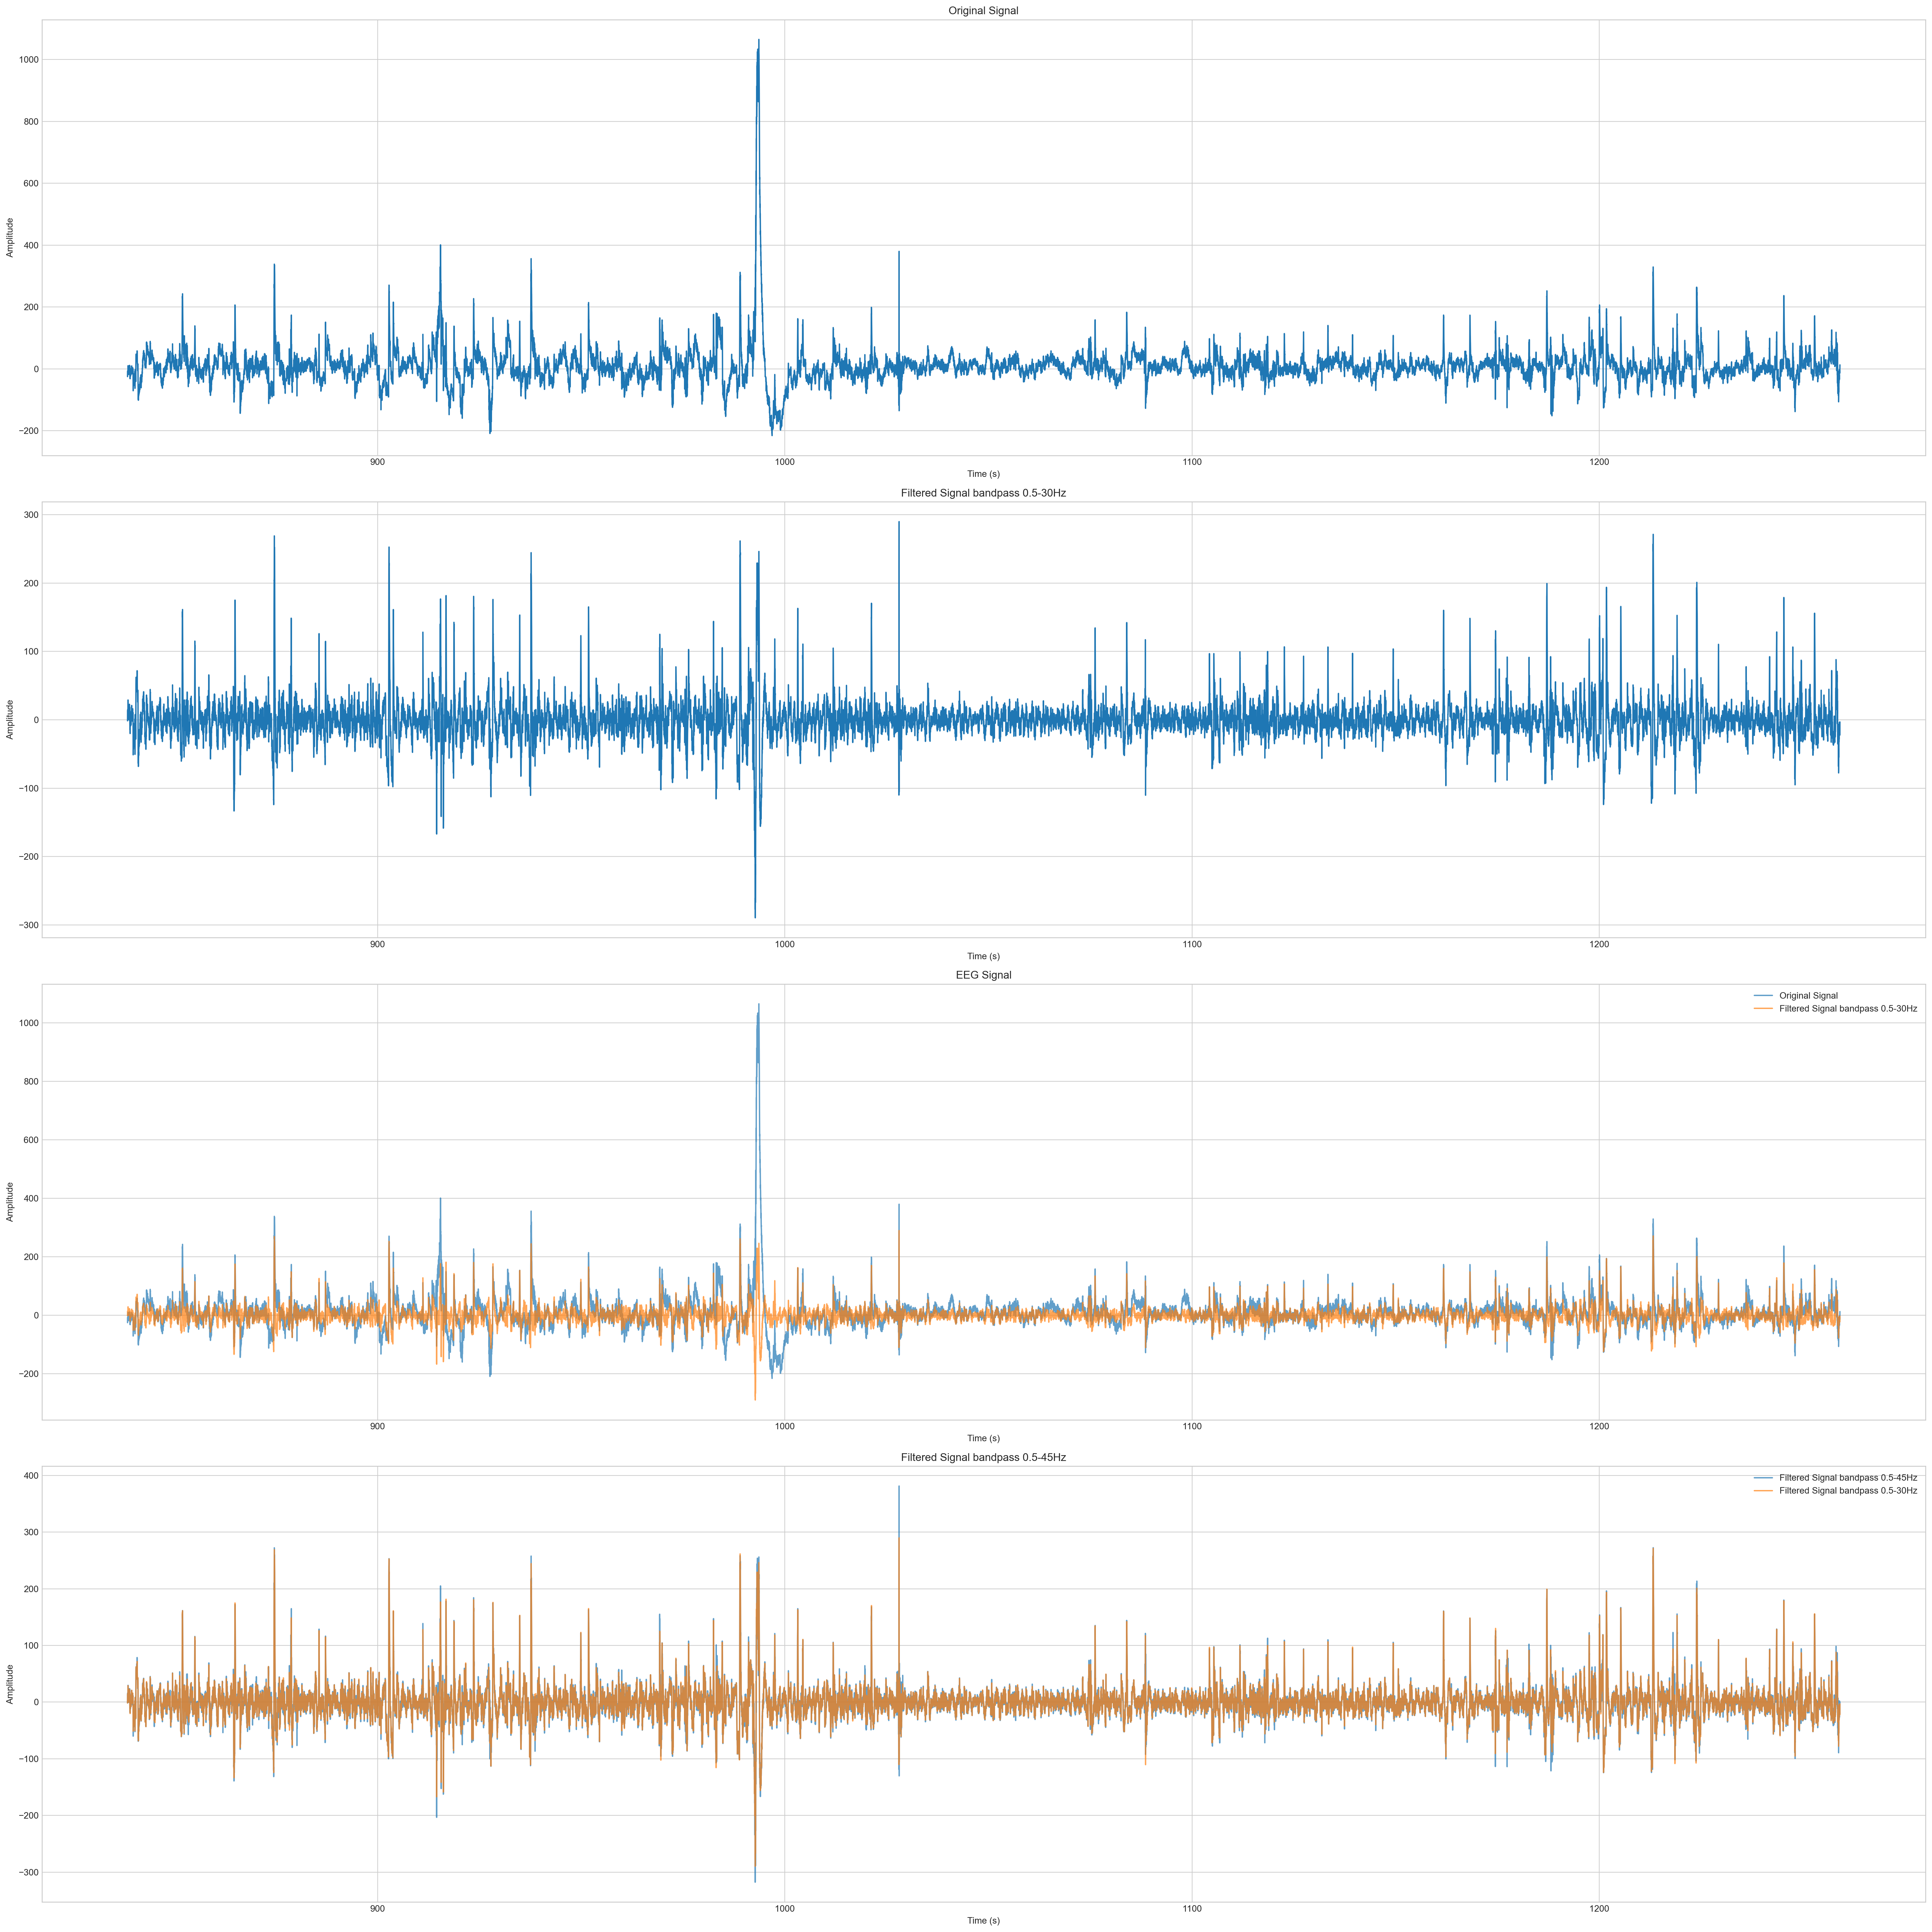

In [33]:
# pass the signal between 0.5 and 30 Hz (eeg single signal)
eeg_single_filtered = bandpass_filter(eeg_single, 0.5, 30, fs, order=5)
eeg_single_filtered_45 = bandpass_filter(eeg_single, 0.5, 45, fs, order=5)
# plot the filtered signal with the original signal
plt.figure(figsize=(30, 5), dpi=200)
plt.plot(time_single, eeg_single, label='Original Signal', alpha=0.7)
plt.plot(time_single, eeg_single_filtered, label='Filtered Signal bandpass 0.5-30Hz', alpha=0.7)
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# do it in subplots, one original signal and one filtered signal and one together
plt.figure(figsize=(30, 30), dpi=200)
plt.subplot(4, 1, 1)
plt.plot(time_single, eeg_single)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(time_single, eeg_single_filtered)
plt.title('Filtered Signal bandpass 0.5-30Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(time_single, eeg_single, label='Original Signal', alpha=0.7)
plt.plot(time_single, eeg_single_filtered, label='Filtered Signal bandpass 0.5-30Hz', alpha=0.7)
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time_single, eeg_single_filtered_45, label='Filtered Signal bandpass 0.5-45Hz', alpha=0.7)
plt.plot(time_single, eeg_single_filtered, label='Filtered Signal bandpass 0.5-30Hz', alpha=0.7)
plt.title('Filtered Signal bandpass 0.5-45Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()




loop: 0
loop: 1
loop: 2
loop: 3
loop: 4


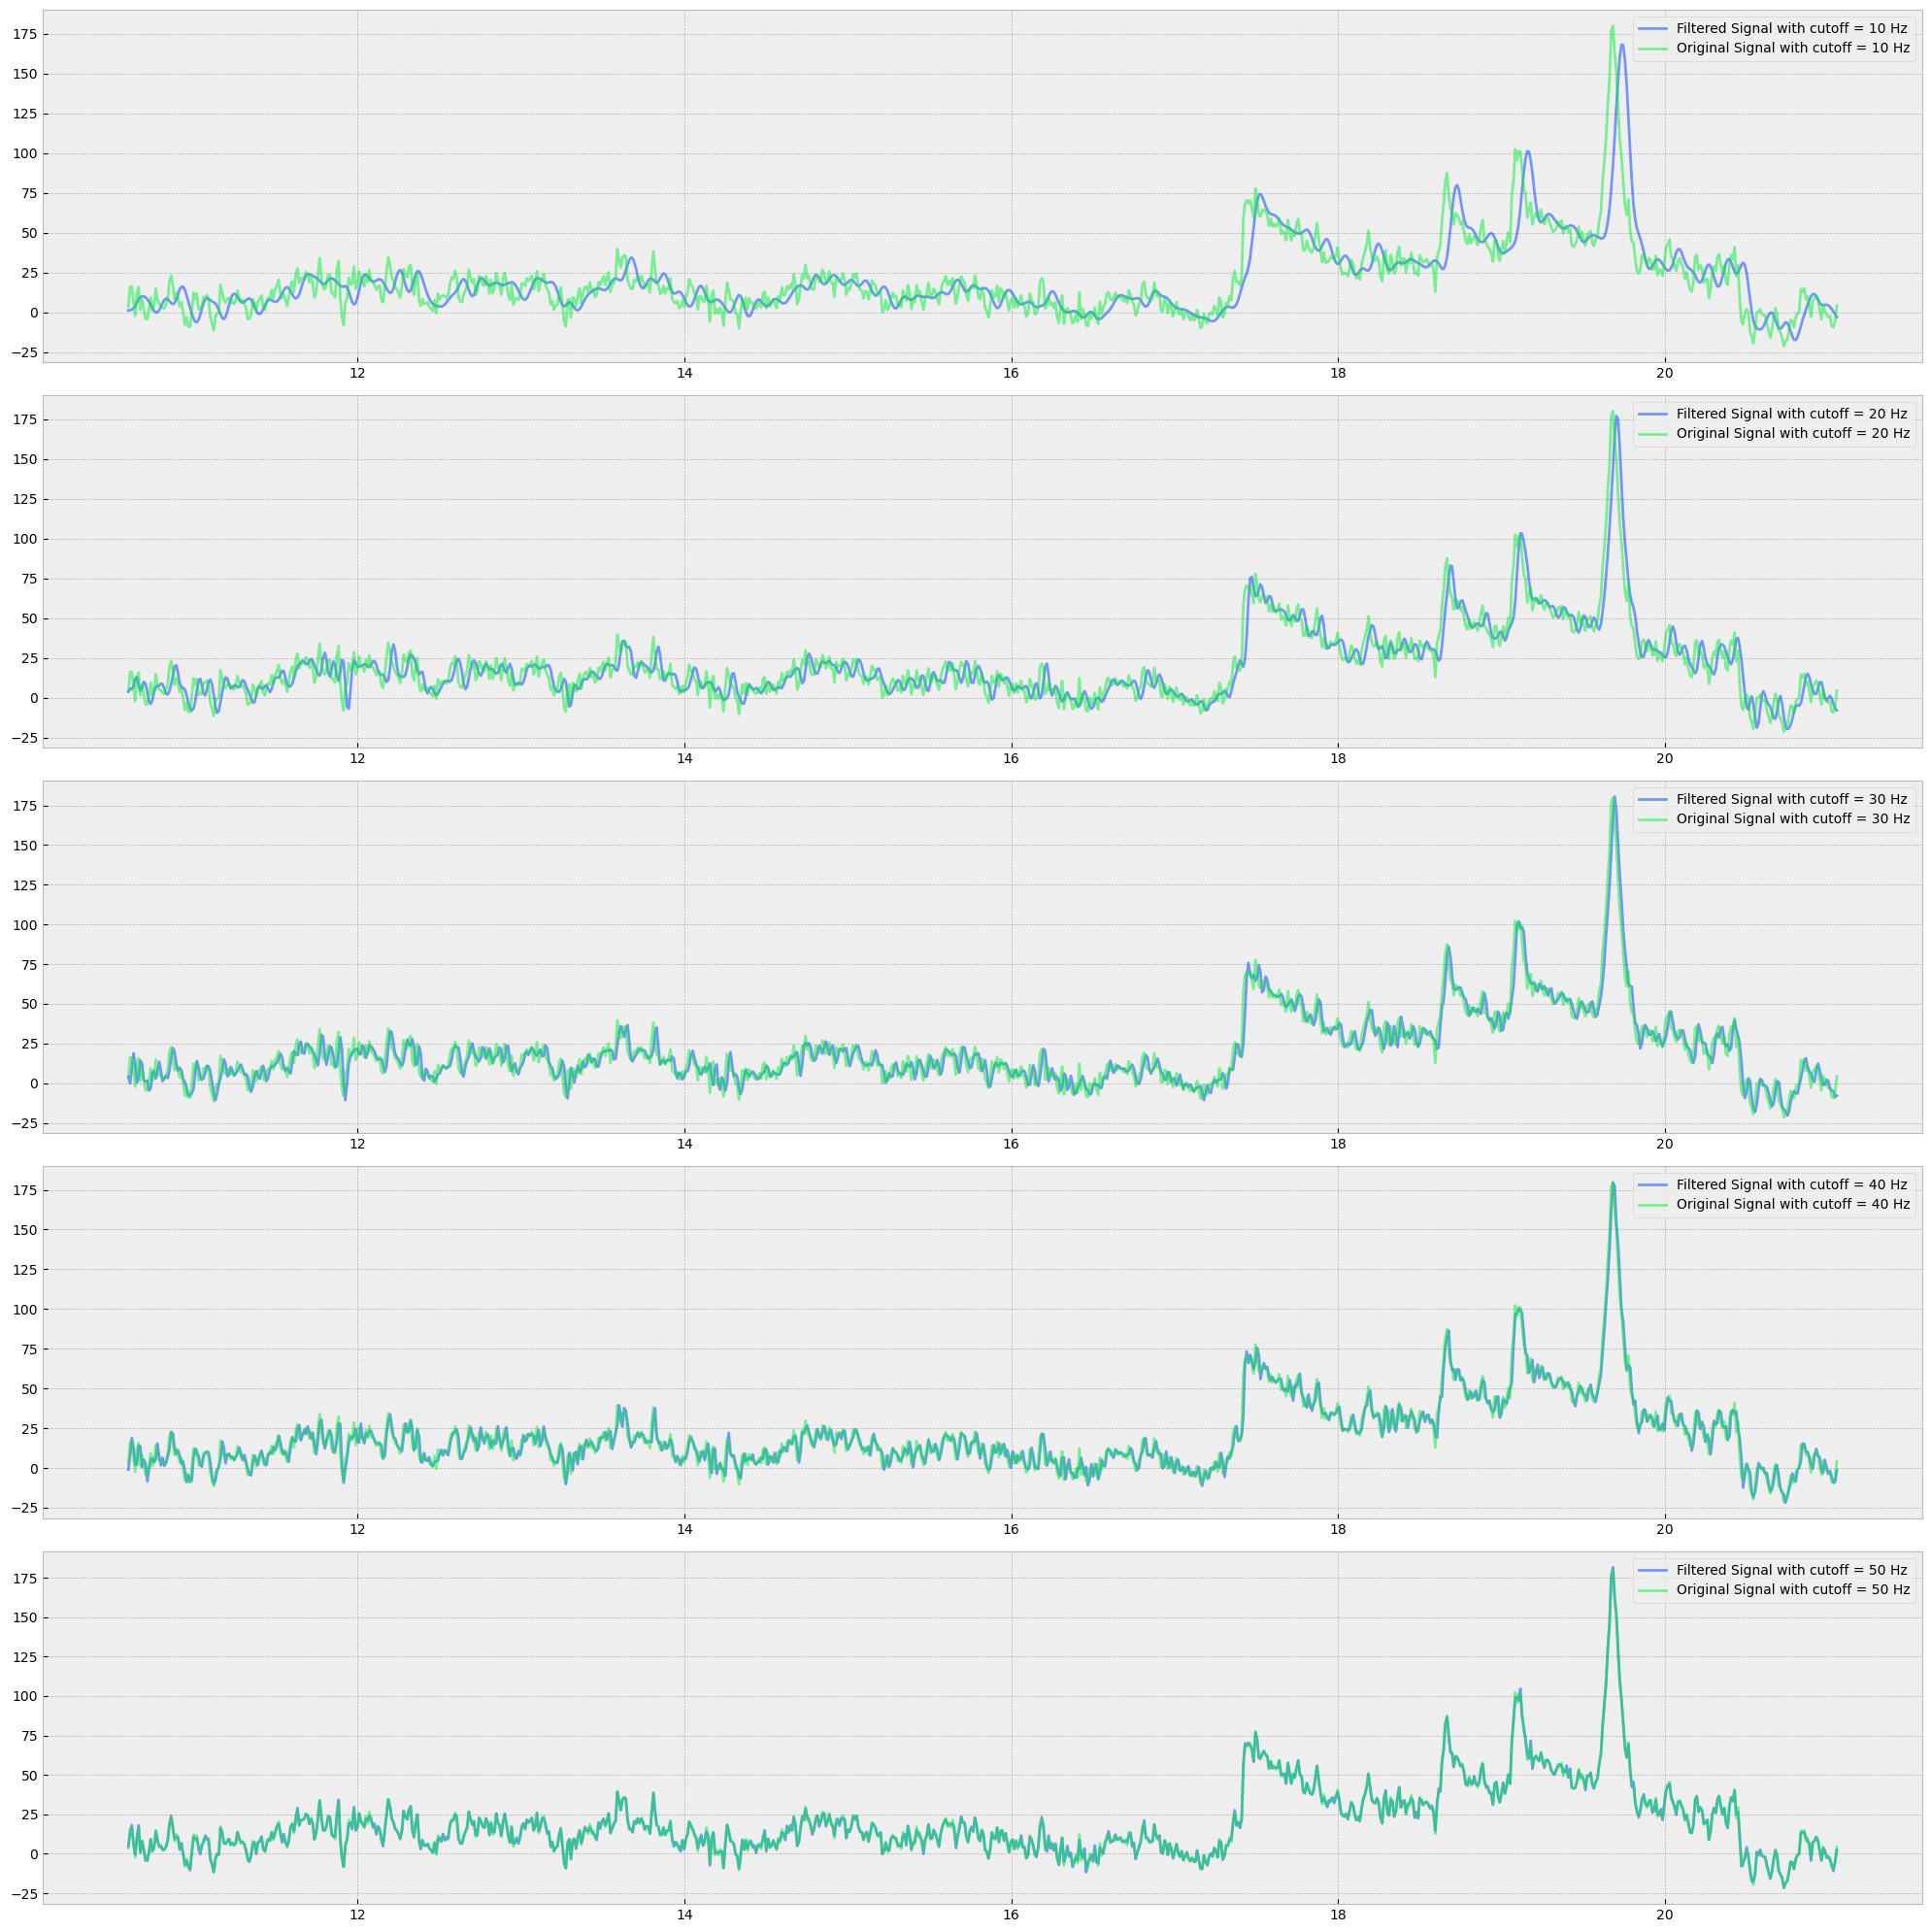

In [100]:
def lp(data, fc): # filter out all freq above 50 with 
    return butter_lowpass_filter(data=data, cutoff=fc, fs=100)

# y = lp(channel_1, 40)
figsize = (20, 20)

fig, axs = plt.subplots(5, 1, figsize=figsize)

for i in range (1, 6):
    index=i-1
    print(f"loop: {index}")
    y = eeg[:, 1]
    y_f = lp(y, i * 10) if i != 5 else lp(y, 49)
    axs[index].plot(time[1000:2000], y_f[1000:2000], alpha=.5, label=f"Filtered Signal with cutoff = {i*10} Hz")
    axs[index].plot(time[1000:2000], y[1000:2000], alpha=.5, label=f"Original Signal with cutoff = {i*10} Hz")
    axs[index].set_xlabel('Time (s)') if index == 5 else None
    axs[index].legend()

plt.tight_layout()
plt.show()

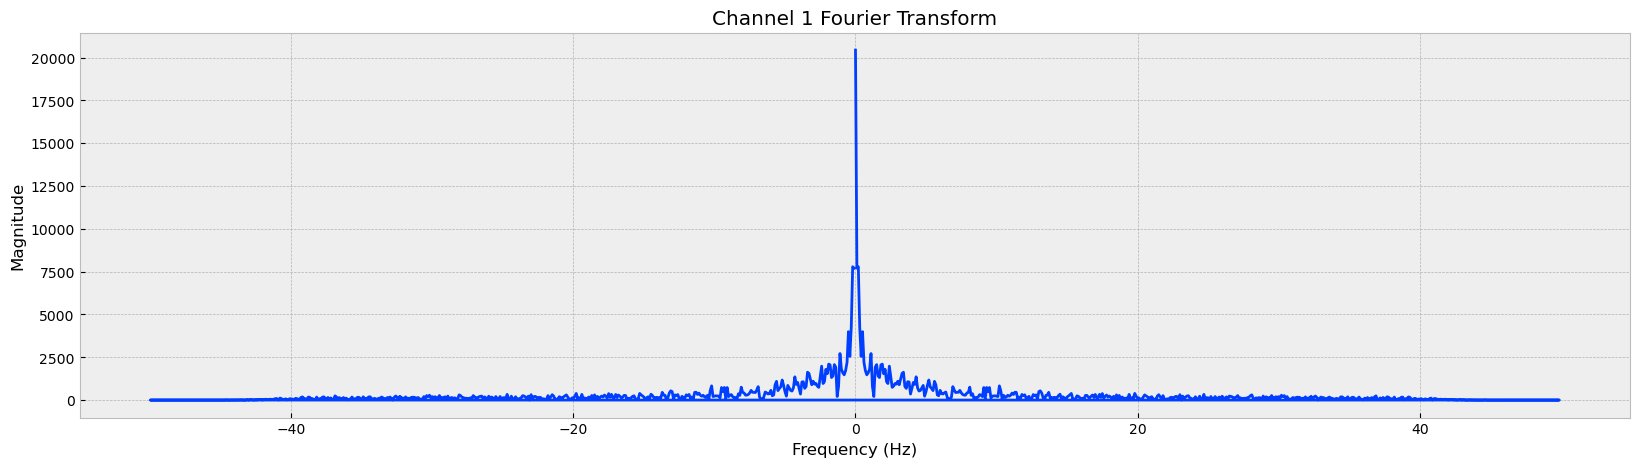

In [106]:
# use fourier transform to get the signal in frequency domain
def fourier_transform(data, fs):
    n = len(data)
    f = np.fft.fftfreq(n, 1/fs)
    y = np.fft.fft(data)
    return f, y

channel_1 = eeg[:, 1]

# filter the signal
channel_1_f = lp(channel_1, 40)
# get the fourier transform
f, y = fourier_transform(channel_1_f[1000:2000], 100)

plt.figure(figsize=(20, 5))
plt.plot(f, np.abs(y))
plt.title('Channel 1 Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

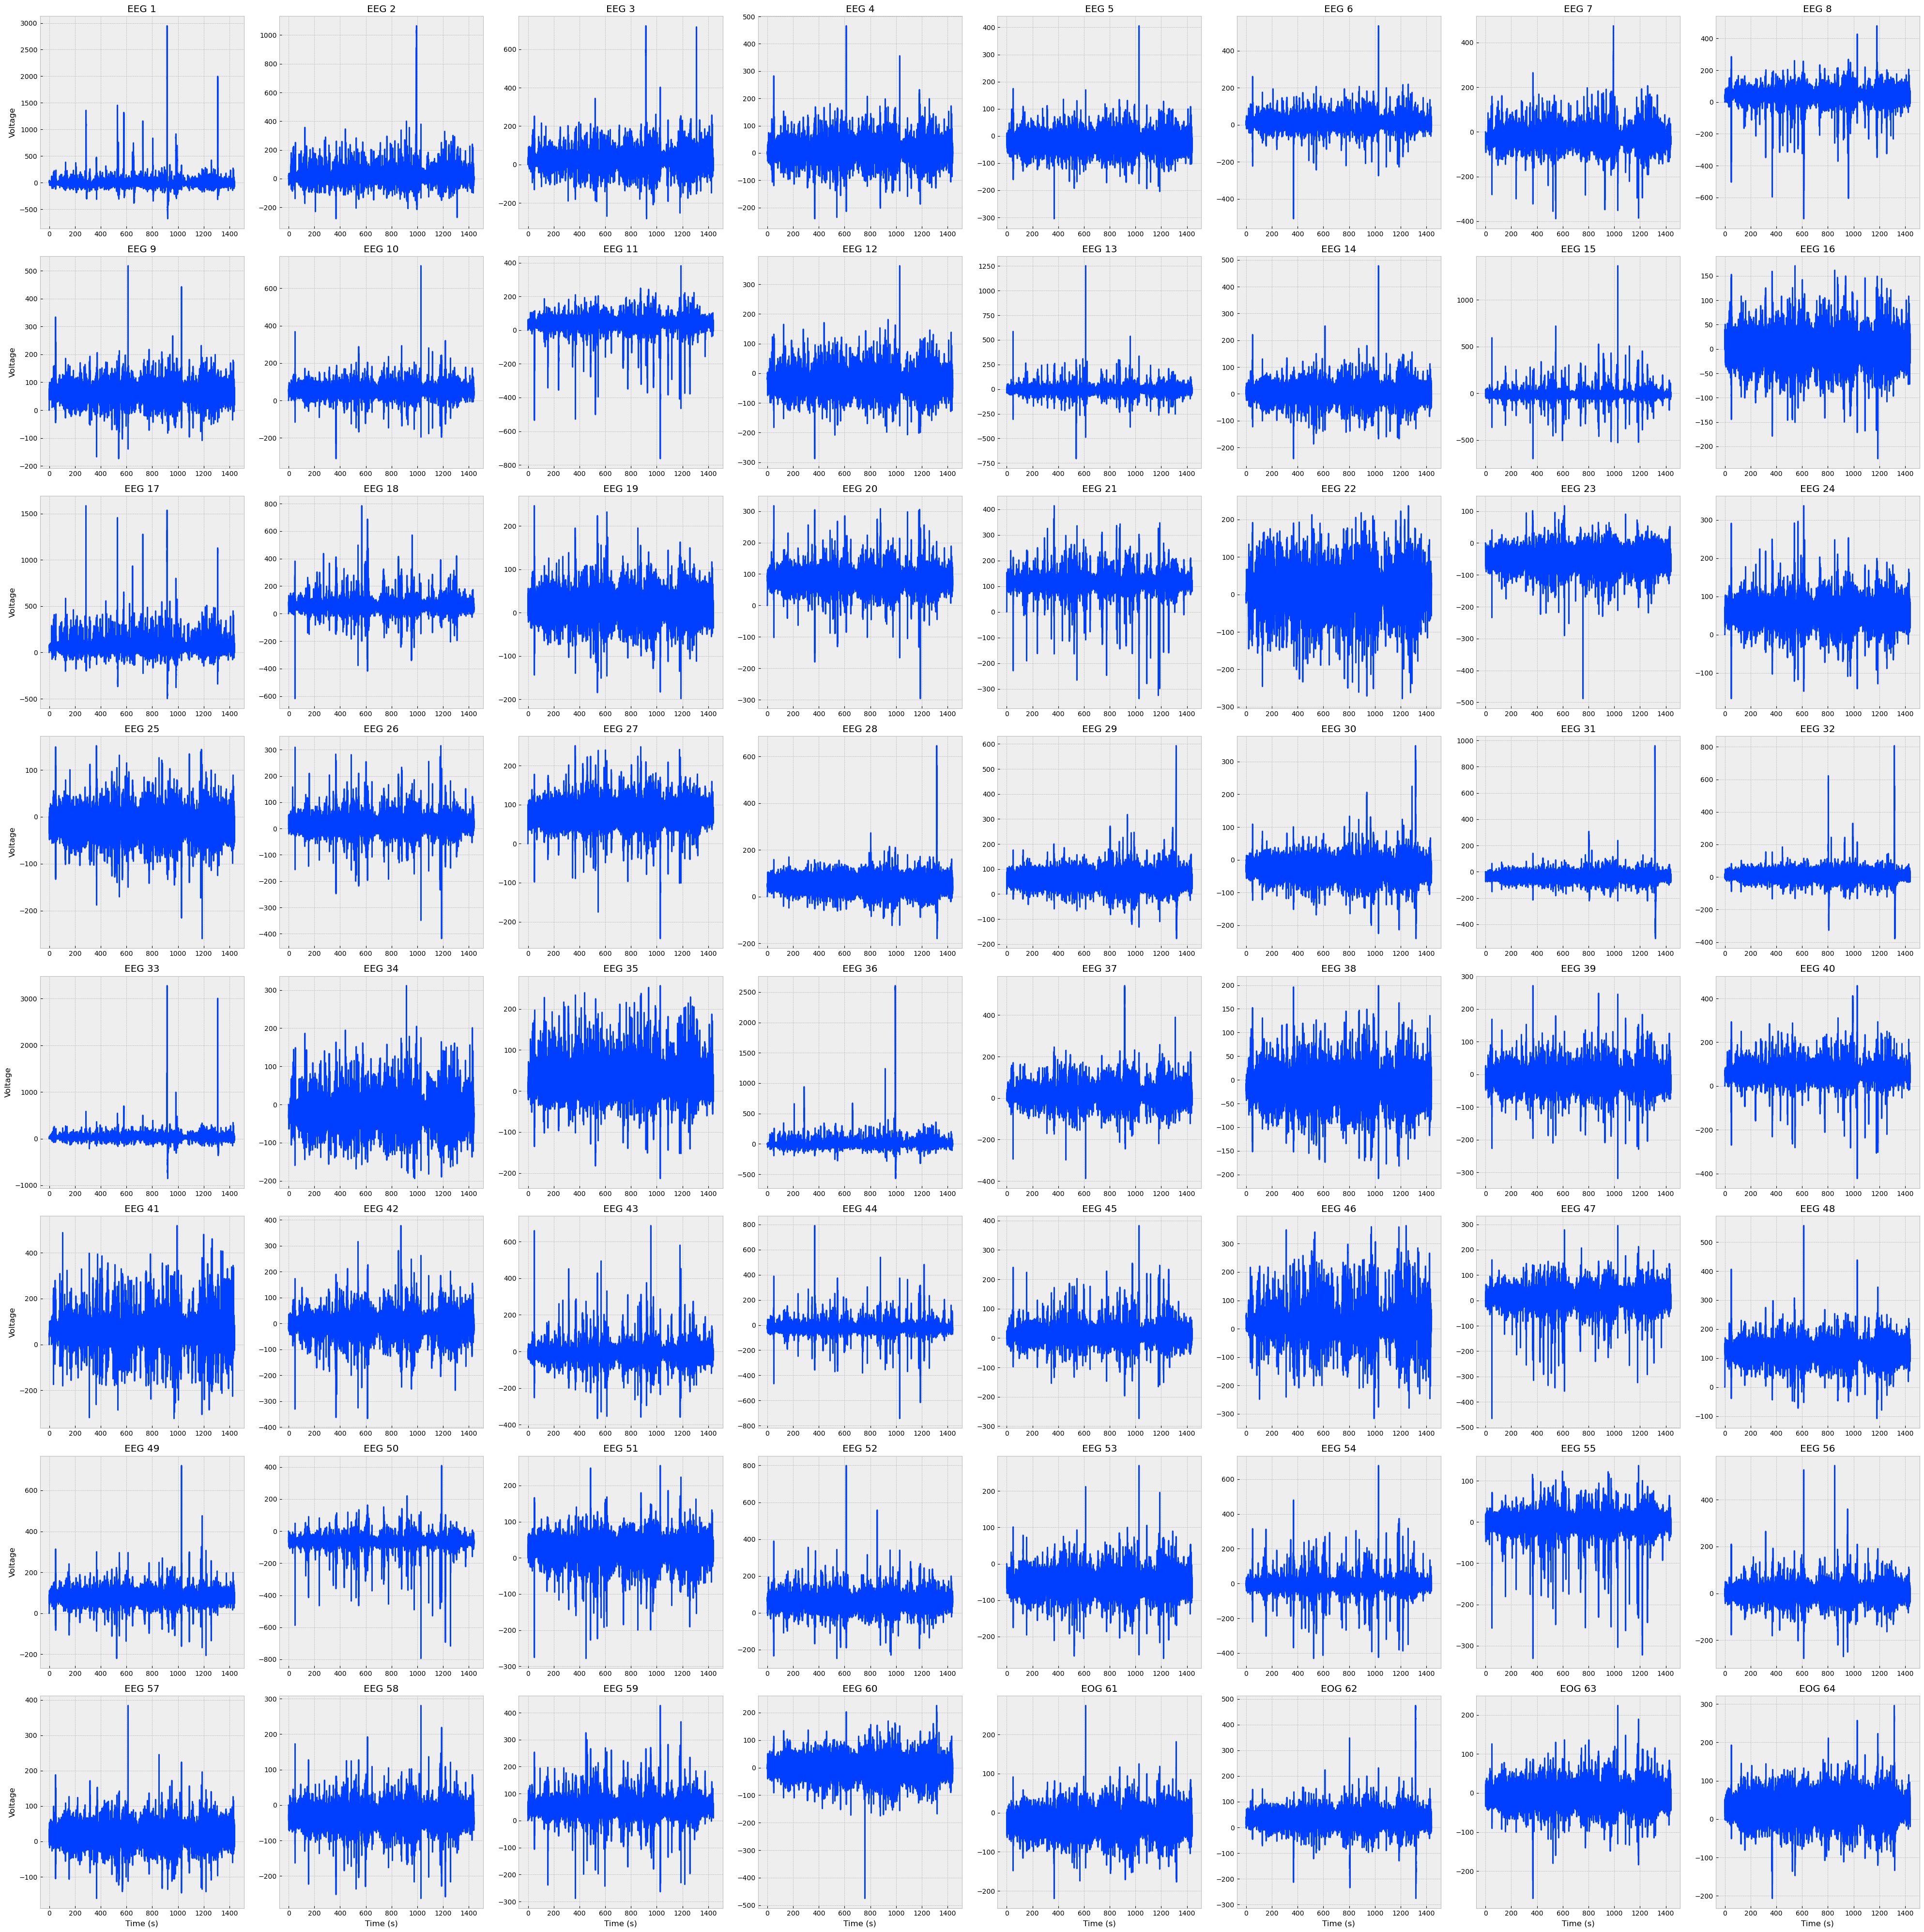

In [63]:
def visualize_subject_eeg_flt(eeg, time):

    eeg_f = lp_50(eeg)
    fig, axs = plt.subplots(8, 8, figsize=(40, 40))
    for i in range(8):
        for j in range(8):
            # axs[i, j].plot(time, eeg[:, i * 8 + j], label="o", alpha=.3)
            axs[i, j].plot(time, eeg_f[:, i * 8 + j], label="f", alpha=.3)
            if i == 7:
                axs[i, j].set_xlabel('Time (s)')
            if j == 0:
                axs[i, j].set_ylabel('Voltage')
            if i * 8 + j < 60:
                axs[i, j].set_title('EEG ' + str(i * 8 + j + 1))
            else:
                axs[i, j].set_title('EOG ' + str(i * 8 + j + 1))
    plt.tight_layout()
    plt.legend()
    plt.show()

visualize_subject_eeg(eeg, time)